# Making a prediction

## Introduction


This notebook offers an interactive tutorial on using PreFab to **predict** the fabrication result of a 500 nm-wide target nanostructure on a silicon-on-insulator (SOI) e-beam lithography process. This tutorial is structured as follows:

1. Preparing a device image for prediction
2. Executing a prediction
3. Analyzing the prediction and uncertainty

To begin, we need to import the necessary libraries:


In [1]:
import prefab as pf

## Loading a device


The first step involves preparing a device for prediction. `Device` is the base class that represents photonic design geometries in PreFab and can be instantiated by loading an image or GDS layout as an ndarray with binary pixel values: 0 or 1. In this tutorial, we'll use an image of a small target structure, but feel free to explore other structures available in the `devices/` directory, or add your own.

The image scale should be 1 nm/px. If not, ensure you specify the length of the entire device image (in nanometers) when loading the image.


<Axes: xlabel='x (nm)', ylabel='y (nm)'>

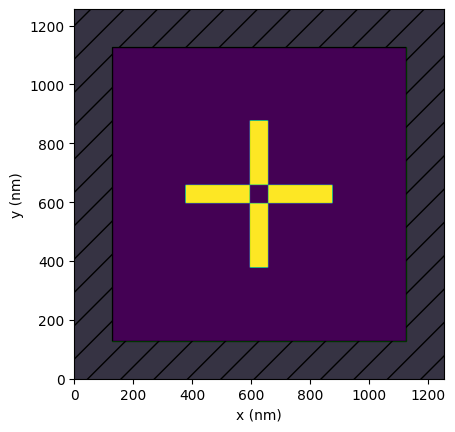

In [2]:
device = pf.read.from_img(
    img_path="../../devices/target_16x128_256x256.png", img_width_nm=1000
)
device.plot()

## Predicting a device


We proceed with the prediction of the device for a specific fabrication model. Each model is labeled by its fabrication facility and process name, model version, and dataset version. Refer to `docs/models.md` for a library of available models.

You can also select if you want a binarized output. The prediction model, by default, produces raw outputs, which includes "fuzzy" edges of the structure that may vary between different fabrication runs or even different device instances on the same chip. When binarized, the prediction model outputs the most probable fabrication outcome (i.e., a threshold of 50%). Post-prediction binarization is also an option, as we'll show here.


> **Note:** Initial prediction/correction may take longer due to server startup and model loading. Subsequent predictions should be quicker.


Prediction: 100%|██████████████████████████████| 100/100 [00:01<00:00, 63.81%/s]


<Axes: xlabel='x (nm)', ylabel='y (nm)'>

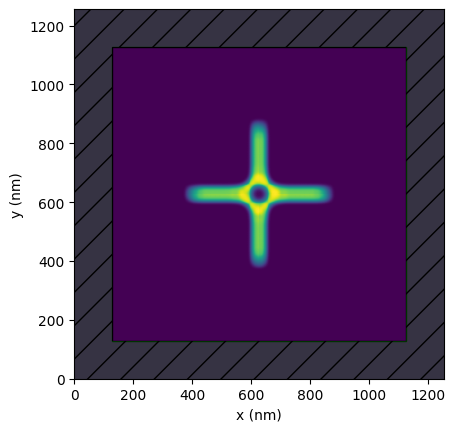

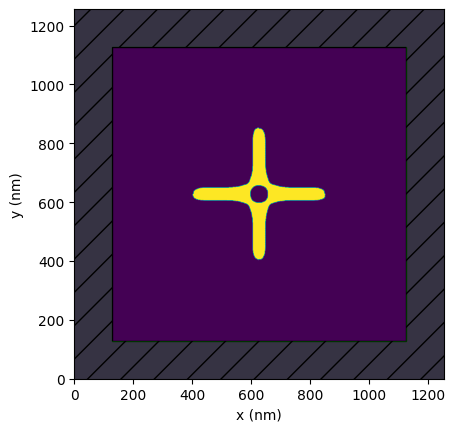

In [3]:
MODEL_NAME = "ANT_NanoSOI"
MODEL_TAGS = "v7-d9"
prediction = device.predict(model_name=MODEL_NAME, model_tags=MODEL_TAGS)
prediction_bin = prediction.binarize()

prediction.plot()
prediction_bin.plot()

## Analyzing a prediction


Comparing the (binary) prediction with the nominal device, we can observe erosion (or corner rounding, or over-etching) in the 64 nm-wide arms and convex corners of the target geometry. We also see dilation (or under-etching) for the concave corners in the center, as well as the complete filling of the center opening.


<Axes: xlabel='x (nm)', ylabel='y (nm)'>

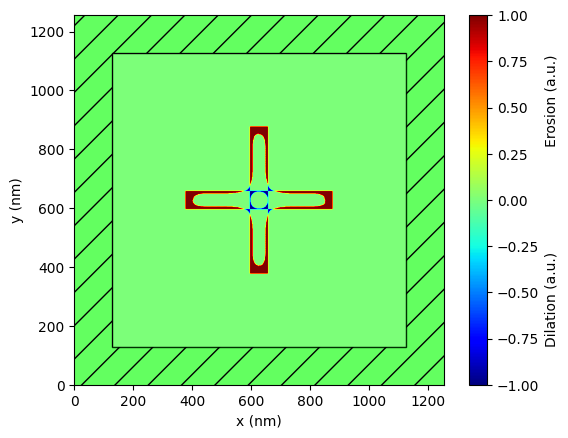

In [4]:
prediction_bin.plot_compare(ref_device=device)

To evaluate the quality of the prediction quantitatively, PreFab provides a function to compute the Intersection over Union (IoU) between the prediction and the nominal device. This metric measures the overlap between the two geometries, where 1.0 indicates a perfect match and 0.0 indicates no overlap.


In [5]:
print(
    f"Prediction IoU: {pf.compare.intersection_over_union(device, prediction_bin):.2f}"
)

Prediction IoU: 0.63


63% is not great, but the feature size was demanding. Try other values for `img_width_nm` and see how it affects the results.


We can further visualize and understand the prediction by highlighting the "fuzzy" edge regions. This is a measure of the uncertainty of the prediction model due to stochastic variance in the fabrication process and the modelling process. From device-to-device, run-to-run, the device edge may lie anywhere in this uncertainty region. Although PreFab cannot correct for uncertainty, visualizing it is valuable in identifying features with high variance.


<Axes: xlabel='x (nm)', ylabel='y (nm)'>

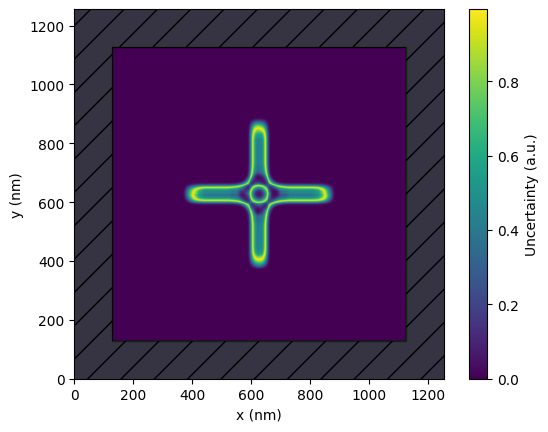

In [6]:
prediction.plot_uncertainty()

And that's it! See the next example to learn how to restore this nanostructure using PreFab's correction capabilities.
